In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [7]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 29), (1121, 29))

In [8]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 29), (169, 29))

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-10-25 20:42:04.468211: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-25 20:42:04.469517: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-25 20:42:04.491449: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-25 20:42:04.491470: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-25 20:42:04.491485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
model = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [12]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [13]:
# model.compile(optimizer=SGD(learning_rate=lr_schedule, 
#                             momentum=0.97, 
#                             nesterov=True),  # Enable Nesterov momentum
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [14]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                                epochs=500,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/500
41/41 - 1s - loss: 1.9024 - accuracy: 0.2559 - val_loss: 1.8138 - val_accuracy: 0.3340 - 561ms/epoch - 14ms/step
Epoch 2/500
41/41 - 0s - loss: 1.7544 - accuracy: 0.3305 - val_loss: 1.6943 - val_accuracy: 0.3834 - 55ms/epoch - 1ms/step
Epoch 3/500
41/41 - 0s - loss: 1.6497 - accuracy: 0.3684 - val_loss: 1.5700 - val_accuracy: 0.4233 - 52ms/epoch - 1ms/step
Epoch 4/500
41/41 - 0s - loss: 1.5645 - accuracy: 0.3967 - val_loss: 1.4990 - val_accuracy: 0.4475 - 54ms/epoch - 1ms/step
Epoch 5/500
41/41 - 0s - loss: 1.5028 - accuracy: 0.4388 - val_loss: 1.4363 - val_accuracy: 0.4653 - 55ms/epoch - 1ms/step
Epoch 6/500
41/41 - 0s - loss: 1.4520 - accuracy: 0.4495 - val_loss: 1.3943 - val_accuracy: 0.4674 - 53ms/epoch - 1ms/step
Epoch 7/500
41/41 - 0s - loss: 1.4266 - accuracy: 0.4533 - val_loss: 1.3529 - val_accuracy: 0.4916 - 53ms/epoch - 1ms/step
Epoch 8/500
41/41 - 0s - loss: 1.3913 - accuracy: 0.4728 - val_loss: 1.3215 - val_accuracy: 0.5011 - 54ms/epoch - 1ms/step
Epoch 9/500
41

Epoch 68/500
41/41 - 0s - loss: 0.9052 - accuracy: 0.6767 - val_loss: 0.9538 - val_accuracy: 0.6576 - 52ms/epoch - 1ms/step
Epoch 69/500
41/41 - 0s - loss: 0.9150 - accuracy: 0.6591 - val_loss: 0.9518 - val_accuracy: 0.6639 - 52ms/epoch - 1ms/step
Epoch 70/500
41/41 - 0s - loss: 0.9088 - accuracy: 0.6718 - val_loss: 0.9537 - val_accuracy: 0.6418 - 53ms/epoch - 1ms/step
Epoch 71/500
41/41 - 0s - loss: 0.8914 - accuracy: 0.6695 - val_loss: 0.9476 - val_accuracy: 0.6618 - 52ms/epoch - 1ms/step
Epoch 72/500
41/41 - 0s - loss: 0.8797 - accuracy: 0.6897 - val_loss: 0.9474 - val_accuracy: 0.6649 - 53ms/epoch - 1ms/step
Epoch 73/500
41/41 - 0s - loss: 0.8862 - accuracy: 0.6760 - val_loss: 0.9429 - val_accuracy: 0.6628 - 53ms/epoch - 1ms/step
Epoch 74/500
41/41 - 0s - loss: 0.8824 - accuracy: 0.6783 - val_loss: 0.9435 - val_accuracy: 0.6670 - 52ms/epoch - 1ms/step
Epoch 75/500
41/41 - 0s - loss: 0.8549 - accuracy: 0.6882 - val_loss: 0.9312 - val_accuracy: 0.6744 - 52ms/epoch - 1ms/step
Epoch 76

Epoch 134/500
41/41 - 0s - loss: 0.7369 - accuracy: 0.7211 - val_loss: 0.8727 - val_accuracy: 0.7069 - 58ms/epoch - 1ms/step
Epoch 135/500
41/41 - 0s - loss: 0.7380 - accuracy: 0.7330 - val_loss: 0.8542 - val_accuracy: 0.7206 - 56ms/epoch - 1ms/step
Epoch 136/500
41/41 - 0s - loss: 0.7111 - accuracy: 0.7448 - val_loss: 0.8475 - val_accuracy: 0.7153 - 58ms/epoch - 1ms/step
Epoch 137/500
41/41 - 0s - loss: 0.7304 - accuracy: 0.7368 - val_loss: 0.8532 - val_accuracy: 0.7132 - 58ms/epoch - 1ms/step
Epoch 138/500
41/41 - 0s - loss: 0.7362 - accuracy: 0.7272 - val_loss: 0.8609 - val_accuracy: 0.7027 - 56ms/epoch - 1ms/step
Epoch 139/500
41/41 - 0s - loss: 0.7280 - accuracy: 0.7337 - val_loss: 0.8572 - val_accuracy: 0.7038 - 55ms/epoch - 1ms/step
Epoch 140/500
41/41 - 0s - loss: 0.7400 - accuracy: 0.7112 - val_loss: 0.8523 - val_accuracy: 0.7153 - 54ms/epoch - 1ms/step
Epoch 141/500
41/41 - 0s - loss: 0.7443 - accuracy: 0.7226 - val_loss: 0.8716 - val_accuracy: 0.7111 - 56ms/epoch - 1ms/step


Epoch 200/500
41/41 - 0s - loss: 0.6346 - accuracy: 0.7586 - val_loss: 0.8332 - val_accuracy: 0.7069 - 58ms/epoch - 1ms/step
Epoch 201/500
41/41 - 0s - loss: 0.6501 - accuracy: 0.7540 - val_loss: 0.8138 - val_accuracy: 0.7216 - 57ms/epoch - 1ms/step
Epoch 202/500
41/41 - 0s - loss: 0.6445 - accuracy: 0.7525 - val_loss: 0.8081 - val_accuracy: 0.7206 - 56ms/epoch - 1ms/step
Epoch 203/500
41/41 - 0s - loss: 0.6427 - accuracy: 0.7617 - val_loss: 0.8237 - val_accuracy: 0.7153 - 58ms/epoch - 1ms/step
Epoch 204/500
41/41 - 0s - loss: 0.6519 - accuracy: 0.7536 - val_loss: 0.8176 - val_accuracy: 0.7216 - 57ms/epoch - 1ms/step
Epoch 205/500
41/41 - 0s - loss: 0.6528 - accuracy: 0.7479 - val_loss: 0.8223 - val_accuracy: 0.7153 - 55ms/epoch - 1ms/step
Epoch 206/500
41/41 - 0s - loss: 0.6419 - accuracy: 0.7594 - val_loss: 0.8123 - val_accuracy: 0.7143 - 53ms/epoch - 1ms/step
Epoch 207/500
41/41 - 0s - loss: 0.6571 - accuracy: 0.7578 - val_loss: 0.7969 - val_accuracy: 0.7290 - 54ms/epoch - 1ms/step


Epoch 266/500
41/41 - 0s - loss: 0.5785 - accuracy: 0.7846 - val_loss: 0.7970 - val_accuracy: 0.7311 - 52ms/epoch - 1ms/step
Epoch 267/500
41/41 - 0s - loss: 0.5649 - accuracy: 0.7865 - val_loss: 0.7903 - val_accuracy: 0.7279 - 52ms/epoch - 1ms/step
Epoch 268/500
41/41 - 0s - loss: 0.5917 - accuracy: 0.7823 - val_loss: 0.7916 - val_accuracy: 0.7353 - 54ms/epoch - 1ms/step
Epoch 269/500
41/41 - 0s - loss: 0.5942 - accuracy: 0.7766 - val_loss: 0.7870 - val_accuracy: 0.7374 - 53ms/epoch - 1ms/step
Epoch 270/500
41/41 - 0s - loss: 0.5746 - accuracy: 0.7884 - val_loss: 0.7792 - val_accuracy: 0.7426 - 53ms/epoch - 1ms/step
Epoch 271/500
41/41 - 0s - loss: 0.5797 - accuracy: 0.7865 - val_loss: 0.7813 - val_accuracy: 0.7353 - 53ms/epoch - 1ms/step
Epoch 272/500
41/41 - 0s - loss: 0.5895 - accuracy: 0.7708 - val_loss: 0.7886 - val_accuracy: 0.7311 - 53ms/epoch - 1ms/step
Epoch 273/500
41/41 - 0s - loss: 0.5676 - accuracy: 0.7877 - val_loss: 0.7780 - val_accuracy: 0.7353 - 52ms/epoch - 1ms/step


Epoch 332/500
41/41 - 0s - loss: 0.5204 - accuracy: 0.8045 - val_loss: 0.7845 - val_accuracy: 0.7489 - 55ms/epoch - 1ms/step
Epoch 333/500
41/41 - 0s - loss: 0.5423 - accuracy: 0.7957 - val_loss: 0.7872 - val_accuracy: 0.7416 - 55ms/epoch - 1ms/step
Epoch 334/500
41/41 - 0s - loss: 0.5359 - accuracy: 0.8060 - val_loss: 0.7834 - val_accuracy: 0.7489 - 57ms/epoch - 1ms/step
Epoch 335/500
41/41 - 0s - loss: 0.5597 - accuracy: 0.7923 - val_loss: 0.7851 - val_accuracy: 0.7374 - 57ms/epoch - 1ms/step
Epoch 336/500
41/41 - 0s - loss: 0.5504 - accuracy: 0.7950 - val_loss: 0.7824 - val_accuracy: 0.7511 - 55ms/epoch - 1ms/step
Epoch 337/500
41/41 - 0s - loss: 0.5539 - accuracy: 0.7930 - val_loss: 0.7926 - val_accuracy: 0.7437 - 57ms/epoch - 1ms/step
Epoch 338/500
41/41 - 0s - loss: 0.5334 - accuracy: 0.7992 - val_loss: 0.7773 - val_accuracy: 0.7405 - 57ms/epoch - 1ms/step
Epoch 339/500
41/41 - 0s - loss: 0.5386 - accuracy: 0.8018 - val_loss: 0.7930 - val_accuracy: 0.7363 - 54ms/epoch - 1ms/step


Epoch 398/500
41/41 - 0s - loss: 0.5204 - accuracy: 0.8076 - val_loss: 0.7737 - val_accuracy: 0.7563 - 57ms/epoch - 1ms/step
Epoch 399/500
41/41 - 0s - loss: 0.5249 - accuracy: 0.8106 - val_loss: 0.7934 - val_accuracy: 0.7542 - 56ms/epoch - 1ms/step
Epoch 400/500
41/41 - 0s - loss: 0.5019 - accuracy: 0.8125 - val_loss: 0.7869 - val_accuracy: 0.7342 - 54ms/epoch - 1ms/step
Epoch 401/500
41/41 - 0s - loss: 0.5159 - accuracy: 0.8057 - val_loss: 0.7900 - val_accuracy: 0.7489 - 55ms/epoch - 1ms/step
Epoch 402/500
41/41 - 0s - loss: 0.5319 - accuracy: 0.7984 - val_loss: 0.7921 - val_accuracy: 0.7511 - 56ms/epoch - 1ms/step
Epoch 403/500
41/41 - 0s - loss: 0.5255 - accuracy: 0.8091 - val_loss: 0.7896 - val_accuracy: 0.7489 - 56ms/epoch - 1ms/step
Epoch 404/500
41/41 - 0s - loss: 0.4894 - accuracy: 0.8194 - val_loss: 0.8072 - val_accuracy: 0.7426 - 55ms/epoch - 1ms/step
Epoch 405/500
41/41 - 0s - loss: 0.5448 - accuracy: 0.8145 - val_loss: 0.7922 - val_accuracy: 0.7447 - 56ms/epoch - 1ms/step


Epoch 464/500
41/41 - 0s - loss: 0.4996 - accuracy: 0.8175 - val_loss: 0.7741 - val_accuracy: 0.7468 - 58ms/epoch - 1ms/step
Epoch 465/500
41/41 - 0s - loss: 0.4839 - accuracy: 0.8183 - val_loss: 0.8009 - val_accuracy: 0.7321 - 56ms/epoch - 1ms/step
Epoch 466/500
41/41 - 0s - loss: 0.5077 - accuracy: 0.8141 - val_loss: 0.7910 - val_accuracy: 0.7416 - 55ms/epoch - 1ms/step
Epoch 467/500
41/41 - 0s - loss: 0.5183 - accuracy: 0.8026 - val_loss: 0.7950 - val_accuracy: 0.7353 - 54ms/epoch - 1ms/step
Epoch 468/500
41/41 - 0s - loss: 0.4867 - accuracy: 0.8168 - val_loss: 0.7876 - val_accuracy: 0.7447 - 56ms/epoch - 1ms/step
Epoch 469/500
41/41 - 0s - loss: 0.4966 - accuracy: 0.8072 - val_loss: 0.7860 - val_accuracy: 0.7300 - 58ms/epoch - 1ms/step
Epoch 470/500
41/41 - 0s - loss: 0.5014 - accuracy: 0.8099 - val_loss: 0.7928 - val_accuracy: 0.7437 - 56ms/epoch - 1ms/step
Epoch 471/500
41/41 - 0s - loss: 0.4811 - accuracy: 0.8240 - val_loss: 0.7897 - val_accuracy: 0.7458 - 56ms/epoch - 1ms/step


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
Total params: 14440 (56.41 KB)
Trainable params: 14440 (

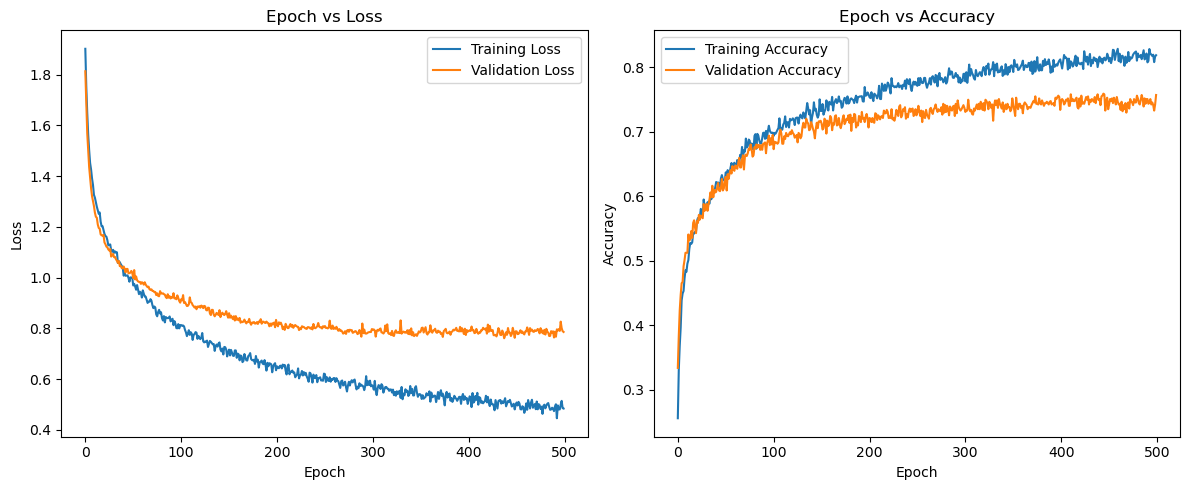

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 94.30%
Test Accuracy: 77.51%


6/6 [==============================] - 0s 861us/step


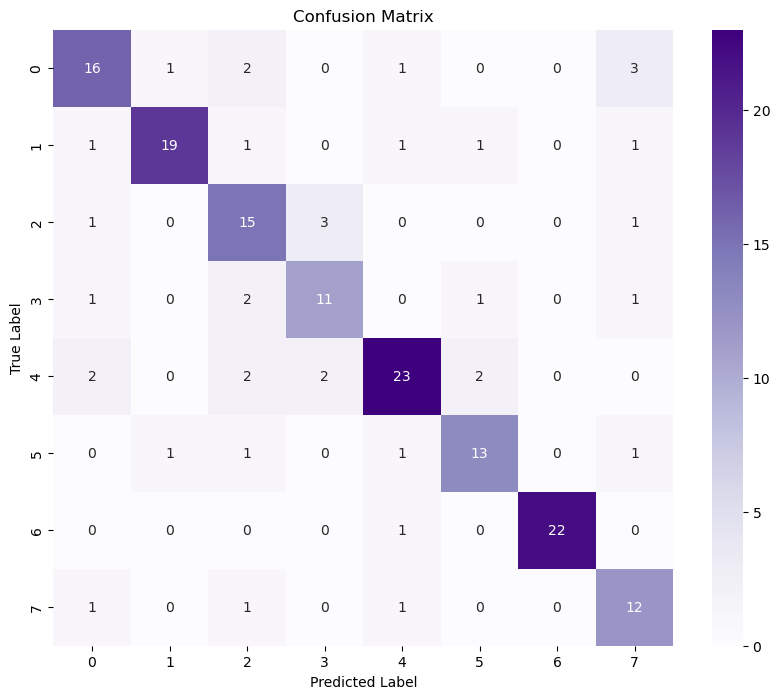

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.90      0.79      0.84        24
           2       0.62      0.75      0.68        20
           3       0.69      0.69      0.69        16
           4       0.82      0.74      0.78        31
           5       0.76      0.76      0.76        17
           6       1.00      0.96      0.98        23
           7       0.63      0.80      0.71        15

    accuracy                           0.78       169
   macro avg       0.77      0.77      0.77       169
weighted avg       0.79      0.78      0.78       169



In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)


In [20]:
model.save('model_4.h5')

/home/ettexham/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
